<h1 align="center">Machine Learning</h1><h2 align="center" style="margin:10px">Assignment 3</h2>

Group 6:  
    287040 Stephan Thierry  
    254172 Kasper Holst Daugaard   


The assignments below should be solved and documented as a mini-project that will form the basis for the
examination. When solving the exercises it is important that you

  * document all relevant results and analyses that you have obtained/performed during the exercises
  * try to relate your results to the theoretical background of the methods being applied.

Feel free to add cells if you need to. The easiest way to convert to pdf is to save this notebook as .html (File-->Download as-->HTML) and then convert this html file to pdf. You can also export as pdf directly, but here you need to watch your margins as the converter will cut off your code (i.e. make vertical code!).

In [68]:
# Import all necessary libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import mglearn

# Exercise 1: Linear vs nonlinear classifiers

Below, we show a dataset that cannot be linearly separated. In this exercise, we will use the default parameters for all classifiers (except the custom SVM in exercise d).

In [69]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(1000, factor=0.0, noise=0.2)



a) Plot the dataset e.g. using the `discrete_scatter`-function from mglearn.

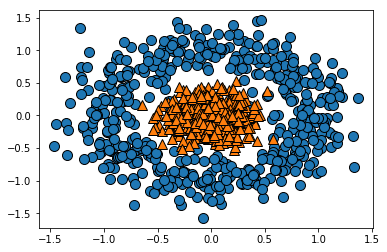

In [70]:
mglearn.discrete_scatter(X[:,0],X[:,1], y)


b) Split the dataset into train and test-sets.

In [71]:
# We use stratify=y to ensure equal representation of the classes in both train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

We stratify on y so the data is split evenly and there is not an overrepresentation of one classification in either of the new datasets

We don't provide a value for "test_size" so we use the default split of 75/25.

c) Train a logistic regression on the dataset, and compute the classification accuracy. 

In [72]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression(solver='lbfgs')
Logreg.fit(X_train,y_train)
print (Logreg.predict_proba([X_test[0]]))
print (Logreg.predict_proba([X_test[10]]))
print (Logreg.predict_proba([X_test[100]]))

print("Accuracy on Training set is: {:.2f}".format(Logreg.score(X_train,y_train)))
print("Accuracy on Test set is: {:.2f}".format(Logreg.score(X_test,y_test)))

[[0.4754139 0.5245861]]
[[0.4923962 0.5076038]]
[[0.50329551 0.49670449]]
Accuracy on Training set is: 0.51
Accuracy on Test set is: 0.46


We train the model on the trainingset and verify the accuracy on the test set. As expected it's around 50%.

d) Plot the decision boundary for the logistic regression (e.g. using the `plot_2d_separator`-function from mglearn), and use this to investigate why the algorithm does not give a good result in this case.

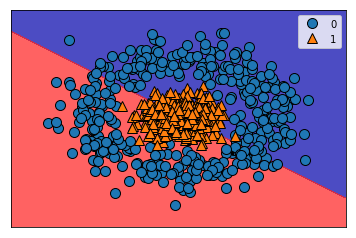

In [73]:
Logreg.fit(X_train,y_train)
from mglearn.plots import plot_2d_separator
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train)
plt.plot(X_train[0,0],X_train[0,1],'k.')
plt.legend()
plot_2d_separator(Logreg, X_train, fill=True, eps=0.4, alpha=.7)




We can see the linier boundry in a 2d space will not accurately seperate the data. It's split down the middle so ~50/50 is the best we can hope for.

e) Think of a feature you could add to this dataset to make it linearly separable. 
Add this feature, retrain the logistic regression classifier, and compute the accuracy again. Comment on the result.

Since the data is a circle inside another circle, adding "distance to the center" as a feature would be useful for a liner (plane) seperation 

Using "distance" from scipy.spatial we calculate the euclidean distance to the center. The center is at 0,0 - but if it was not, we could calculate is and change the center-variable accordingly

See code comments for details:

In [74]:
## Add distance as new feature

from scipy.spatial import distance
from sklearn.svm import LinearSVC

center = [0,0];
X2 = np.empty([0,3])

# We run through each row of X and add the distance as a feature in each row
for eachitem in X:
    # Calculate distance to center
    dist = distance.euclidean(center, eachitem)
    # Add (insert) the distance to the current row and add (vertical-stack) the result to the resultset: X2 
    X2 = np.vstack((X2,np.insert(eachitem, 2, dist)))


# We do a new split so test and traing sets contain the new feature
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, stratify=y)

## We use the X_plot and y_plot vaiables so we can run the plot-code on both 
##  the full dataset and the training-set by only changing 2 lines

##X_plot = X2
##y_plot = y

X_plot = X2_train
y_plot = y2_train

Accuracy on training set: 0.99
Accuracy on test set: 0.99


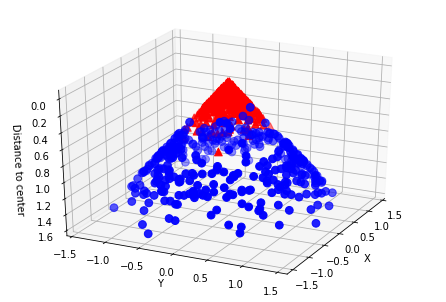

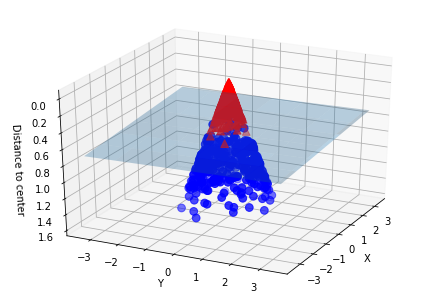

In [75]:

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y_plot == 0
ax.scatter(X_plot[mask, 0], X_plot[mask, 1], X_plot[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_plot[~mask, 0], X_plot[~mask, 1], X_plot[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Distance to center")

linear_3d = Logreg.fit(X_plot, y_plot)
coef, intercept = linear_3d.coef_.ravel(), linear_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_plot[:, 0].min() - 2, X_plot[:, 0].max() + 2, 50)
yy = np.linspace(X_plot[:, 1].min() - 2, X_plot[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_plot[mask, 0], X_plot[mask, 1], X_plot[mask, 2], c='b',
    cmap=mglearn.cm2, s=60)
ax.scatter(X_plot[~mask, 0], X_plot[~mask, 1], X_plot[~mask, 2], c='r', marker='^',
    cmap=mglearn.cm2, s=60)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Distance to center")

print('Accuracy on training set: {:.2f}'.format(linear_3d.score(X2_train, y2_train)))
print('Accuracy on test set: {:.2f}'.format(linear_3d.score(X2_test, y2_test)))


As expected, and as shown on the plot - the accuracy is quite high ~99%

f) Now, return to the original dataset (without the extra feature), and train a kernelized SVM on the dataset. Compute the accuracy and plot the decision boundary. Compare to your previous results and discuss the differences.

Accuracy on training set: 0.99
Accuracy on test set: 0.98


Text(0, 0.5, 'Y')

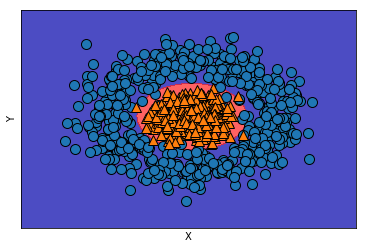

In [76]:
from sklearn.svm import SVC
svm = SVC(gamma='auto').fit(X_train,y_train)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

##fig, axes = plt.subplots(figsize=(10, 3))

plot_2d_separator(svm, X, fill=True, eps=0.5, alpha=.7 )
##plt.figure(figsize=(20,20))
print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm.score(X_test, y_test)))
plt.xlabel("X")
plt.ylabel("Y")

# Accuracy on test set is only slightly lower than in the prevoius example: ~0.98 


The kernelized SVM does not rely on a liniear seperation of the already existing features, so we don't need to add out own feature to move into a higher dimension and thereby achive accurate seperation.



C: 0.1 Gamma: 0.1
Accuracy on training set: 0.60
Accuracy on test set: 0.60

C: 0.1 Gamma: 1
Accuracy on training set: 0.99
Accuracy on test set: 0.98

C: 0.1 Gamma: 10
Accuracy on training set: 0.99
Accuracy on test set: 0.99

C: 1 Gamma: 0.1
Accuracy on training set: 0.97
Accuracy on test set: 0.97

C: 1 Gamma: 1
Accuracy on training set: 0.99
Accuracy on test set: 0.98

C: 1 Gamma: 10
Accuracy on training set: 0.99
Accuracy on test set: 0.98

C: 1000 Gamma: 0.1
Accuracy on training set: 0.99
Accuracy on test set: 0.98

C: 1000 Gamma: 1
Accuracy on training set: 0.99
Accuracy on test set: 0.98

C: 1000 Gamma: 10
Accuracy on training set: 1.00
Accuracy on test set: 0.98



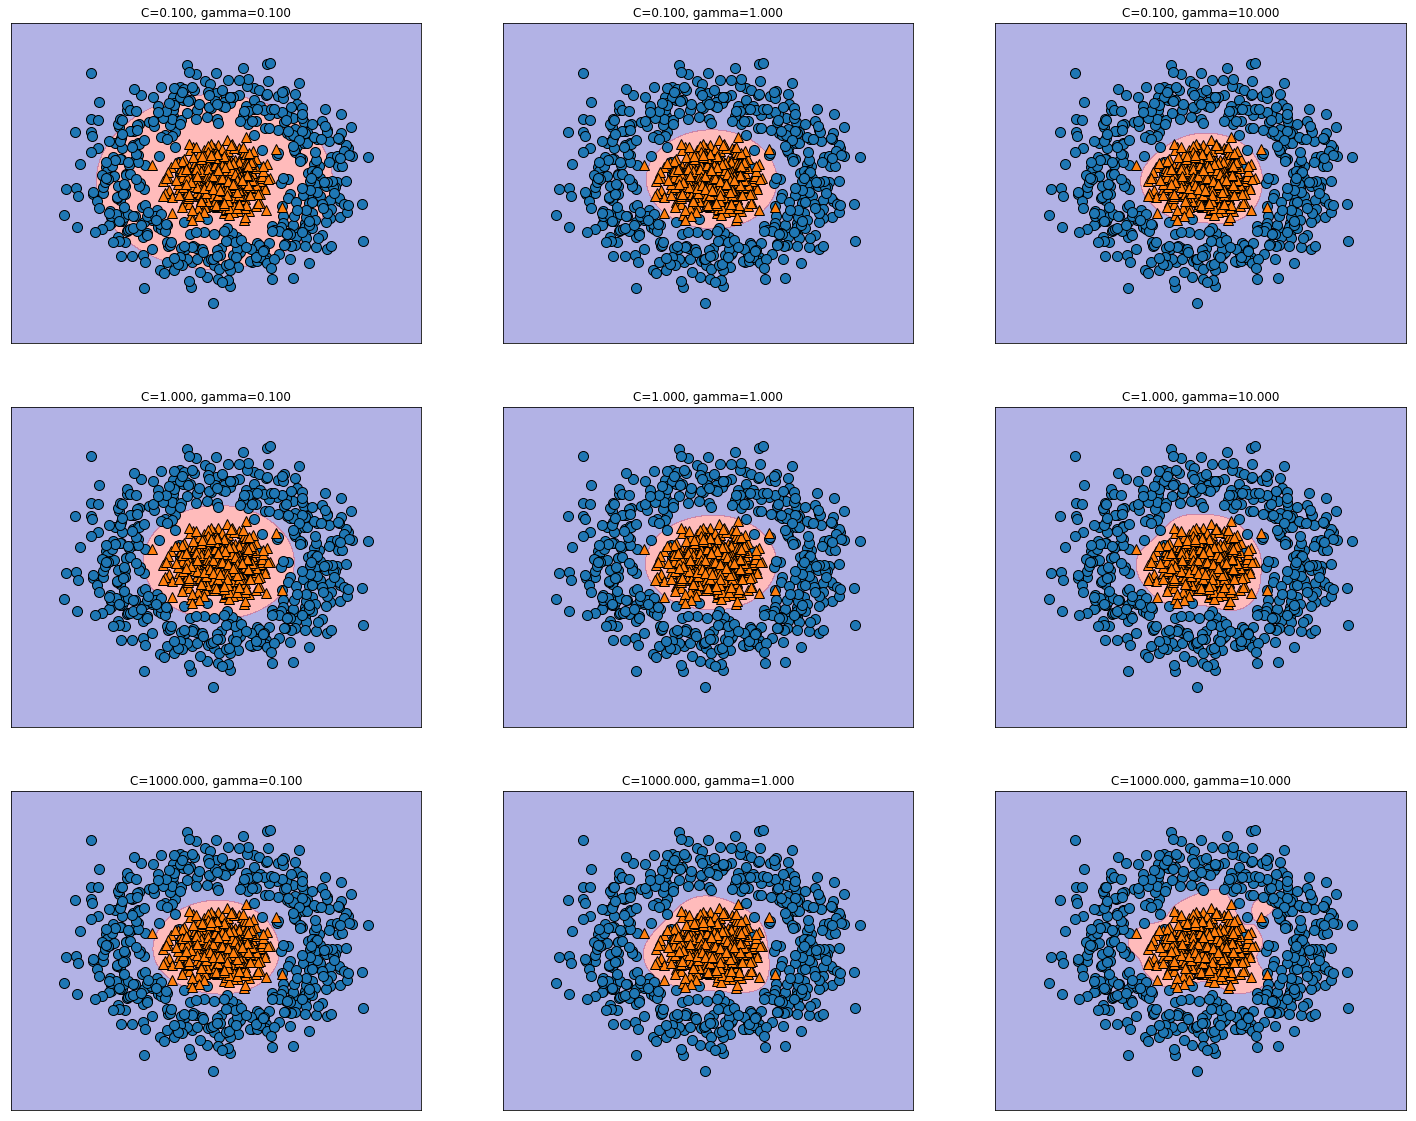

In [81]:
## The 9 examples below show differente settings of the hyperparameters C and Gamme

fig, axes = plt.subplots(3, 3, figsize=(25,20))

for ax, C in zip(axes, [0.1, 1, 1000]):
    for a, gamma in zip(ax,[0.1, 1, 10]):
        svm = SVC(C=C, gamma=gamma).fit(X,y)
        mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=a)
        mglearn.plots.plot_2d_separator(svm, X, eps=.5, fill=True, alpha=0.3, ax=a)
        a.set_title("C={:.3f}, gamma={:.3f}".format(C,gamma))
        svm.fit(X_train, y_train)
        print("C: " + str(C) + " Gamma: " + str(gamma))
        print("Accuracy on training set: {:.2f}".format(svm.score(X_train, y_train)))
        print("Accuracy on test set: {:.2f}\n".format(svm.score(X_test, y_test)))
        


# Exercise 2: MNIST

In [82]:
print(axes);

[[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020EE53A9550>


In this exercise, we consider the famous MNIST dataset, which is loaded below. The part of the dataset loaded as `testX` and `testY` will be reserved for testing - i.e. these cannot be used at all during training. 

It might be a good idea to only use part of the dataset (`X` and `Y`) while tuning parameters (in order to reduce the training-time).

In [128]:
import tflearn.datasets.mnist as mnist
X, Y, testX, testY = mnist.load_data()

Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


The code-snippet below can be used to see the digits corresponding to individual digits:

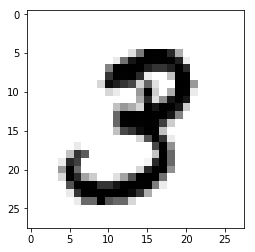

In [129]:
import matplotlib.pyplot as plt
index = 1

plt.imshow(X[index].reshape(28,28),cmap=plt.cm.gray_r)
plt.show()

a) Split the training data into a training and a validation (test) set.

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y)

### Binary classification

b) To begin with, in order to make things a little bit simpler (and faster!), extract from the data a binary subset, that only contains the data for two selected digits:

Value shown: 7


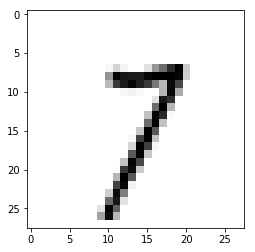

Value shown: 1


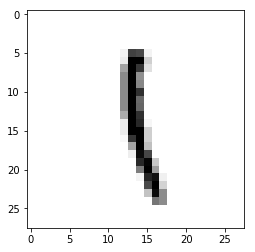

Value shown: 7


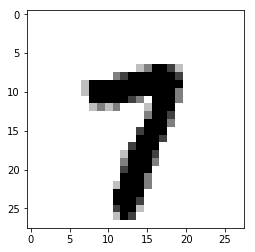

Value shown: 1


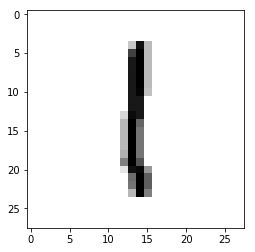

Value shown: 1


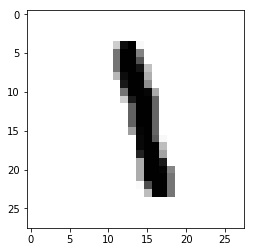

In [151]:
import numpy as np

## Take two digits 1 and 7 - since they are close to each other in overall shape
reducedDigits = [1,7]

reducedDigits_train = np.isin(y_train, reducedDigits)
reducedDigits_test = np.isin(y_test, reducedDigits)

X_train, y_train = X_train[reducedDigits_train], y_train[reducedDigits_train]
X_test, y_test = X_test[reducedDigits_test], y_test[reducedDigits_test]

for img, target in zip(X_train[:5], y_train[:5]):
    print("Value shown: "+ str(target))
    plt.imshow(img.reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()


c) Learn different SVM models by varying the kernel function. For each configuration,
determine the time it takes to learn the model, and the accuracy on the validation data. *Caution*: for some
configurations, learning here can take a little while (several minutes).

In [150]:
#It must be one of ‘poly’ (polynominal), ‘rbf’ (radial basis function), ‘sigmoid’
import mglearn
import time

OptimizeHyperParams = True

if OptimizeHyperParams:
    for C in [0.1, 1, 1000]:
        for gamma in [0.1, 1, 10]:
            for kernel in ['poly']: # ,'rbf','sigmoid'
                start = time.time()
                svm = SVC(C=C, gamma=gamma, kernel=kernel).fit(X_train,y_train)
                end = time.time()
                #mglearn.discrete_scatter(X_train_subset[:,0],X_train_subset[:,1], y_train_subset, ax=a)
                #mglearn.plots.plot_2d_separator(svm, X_train_subset, eps=.5, fill=True, alpha=0.3, ax=a)
                #a.set_title("C={:.3f}, gamma={:.3f}".format(C,1))
                print("C: " + str(C) + " gamma: " + str(gamma) + " Kernel: "+ kernel + " Time: " + str(end - start))
                print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, y_train)))
                print("Accuracy on test subset: {:.2f}\n".format(svm.score(X_test, y_test)))
else: 
    start = time.time()
    svm = SVC(C=1, gamma=1, kernel='poly').fit(X_train,y_train)
    end = time.time()
    print("C: 1  gamma: 1  Kernel: poly Time: " + str(end - start))
    print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, y_train)))
    print("Accuracy on test subset: {:.2f}\n".format(svm.score(X_test, y_test)))
    
# From the result below it's quite clear that the "poly"-kernel is the fastest (in all cases by more than an order of 
#  magnitude) and also the must accurate model. For any combination of the hyperparameters "C" (cost of misclassification) 
#  and "gamma" we get a 100% accuracy on the test-set 

# 1,7 
# C: 0.1 gamma: 0.1 Kernel: poly Time: 4.878988981246948
# Accuracy on training subset: 1.00
# Accuracy on test subset: 1.00

# 4,5
# C: 1  gamma: 1  Kernel: poly Time: 3.9960029125213623
# Accuracy on training subset: 1.00
# Accuracy on test subset: 1.00

# 2,5
# C: 1  gamma: 1  Kernel: poly Time: 5.003990411758423
# Accuracy on training subset: 1.00
# Accuracy on test subset: 1.00
# Misclassified: 11 / 2614


C: 0.1 gamma: 0.1 Kernel: poly Time: 211.67399406433105
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 0.1 gamma: 1 Kernel: poly Time: 257.71789813041687
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 0.1 gamma: 10 Kernel: poly Time: 267.8802845478058
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1 gamma: 0.1 Kernel: poly Time: 217.2142472267151
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1 gamma: 1 Kernel: poly Time: 220.50054335594177
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1 gamma: 10 Kernel: poly Time: 219.67600011825562
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1000 gamma: 0.1 Kernel: poly Time: 220.28109622001648
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1000 gamma: 1 Kernel: poly Time: 220.99100399017334
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

C: 1000 gamma: 10 Kernel: poly Time: 226.37500

## Stats when run on the complete dataset

**C: / G:**
C: 0.1 gamma: 0.1 Kernel: poly Time: 211.67399406433105  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 0.1 gamma: 1 Kernel: poly Time: 257.71789813041687  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 0.1 gamma: 10 Kernel: poly Time: 267.8802845478058  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 1 gamma: 0.1 Kernel: poly Time: 217.2142472267151  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 1 gamma: 1 Kernel: poly Time: 220.50054335594177  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 1 gamma: 10 Kernel: poly Time: 219.67600011825562  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  
  
C: 1000 gamma: 0.1 Kernel: poly Time: 220.28109622001648  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98  

d) Find a way to extract the misclassified test cases. Inspect some misclassified cases and display them along with their correct label.
Do they correspond to hard to recognize digits (also for the human reader)?  

Accuracy on training subset: 1.00
Accuracy on test subset: 1.00
Misclassified: 13 / 2974
Prediction: 1
Actual: 7


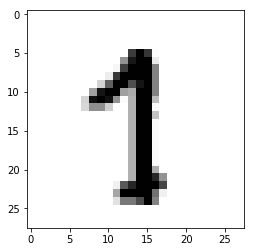

Prediction: 7
Actual: 1


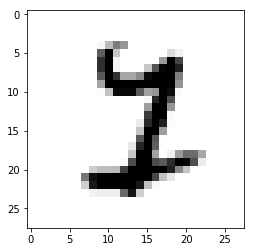

Prediction: 1
Actual: 7


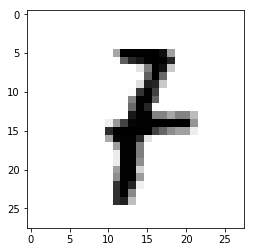

Prediction: 1
Actual: 7


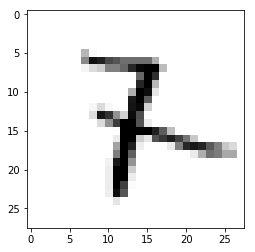

Prediction: 1
Actual: 7


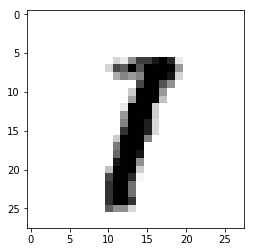

Prediction: 1
Actual: 7


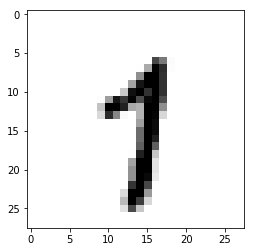

Prediction: 1
Actual: 7


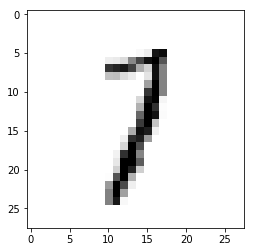

Prediction: 7
Actual: 1


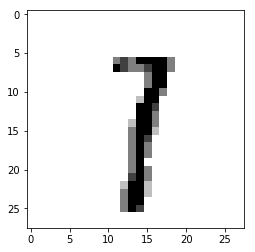

Prediction: 7
Actual: 1


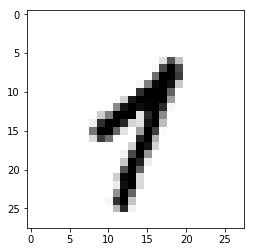

Prediction: 1
Actual: 7


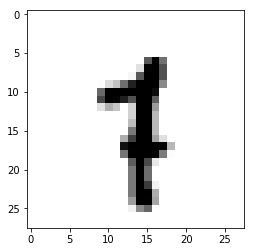

Prediction: 7
Actual: 1


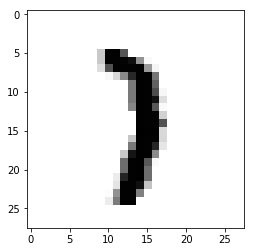

Prediction: 7
Actual: 1


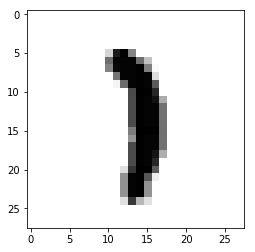

Prediction: 1
Actual: 7


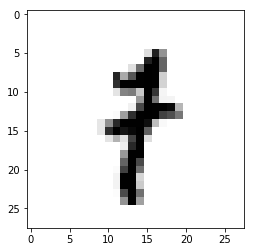

In [154]:
svm = SVC(C=1, gamma=1, kernel='poly').fit(X_train,y_train)
print("Accuracy on training subset: {:.2f}".format(svm.score(X_train, y_train)))
print("Accuracy on test subset: {:.2f}".format(svm.score(X_test, y_test)))
import matplotlib.pyplot as plt


misclassified = np.where(y_test != svm.predict(X_test))
misclassified = misclassified[0]
misclassified_count = misclassified.size
print("Misclassified: " + str(misclassified_count) + " / " + str(y_test.size))
predictions = svm.predict(X_test)

for i in range(misclassified_count):
    print("Prediction: "  + str(predictions[misclassified[i]]))
    print("Actual: " + str(y_test[misclassified[i]]))
    
    plt.imshow(X_test[misclassified[i]].reshape(28,28),cmap=plt.cm.gray_r)
    plt.show()
    
# In the example below (1, 7) a few could be read by a human, but several are either somewhat incomplete or 
#  up for interpretation depending on the viewing angle


e) How do results (time and accuracy) change, depending on whether you consider
an 'easy' binary task (e.g. distinguishing '1' and '0') or a more difficult one (e.g. '4' vs. '5'). This exercise
requires you to make new datasets with different values for 'digit1' and 'digit2'.

**E:** As show in the summary below task c) some combinations take about 20-25% longer to process 
than other. But overall the accuracy is the same

When we do a "poly"-only optimization on the full dataset we get: 
C: 1  gamma: 1  Kernel: poly Time: 219.93132948875427  
Accuracy on training subset: 1.00  
Accuracy on test subset: 0.98   


### Multiclass classification

f) [Discussion only] Explain how a binary classifier, such as an SVM, can be applied to a multiclass classification problem, such as recognizing all 10 digits in the MNIST dataset.

**F:** Unlike LinearSVC's “one-vs-the-rest” where NbrOfClassifiers = NbrOfClasses(*), the multi-classification approach in SVC is "one-against-one". Basically it trains a number of binary classifyiers and compares them. NbrOfClassifiers = NbrOfClasses * (NbrOfClasses-1)/2

*) except for the case of 2 classes, then only 1 classifyier is trained


g) From the binary classification exercise above, identify a good configuration that gives a reasonable combination
of accuracy and runtime. Use this configuration to perform a full classification of the 10 classes in the
original dataset. Report the accuracy obtained on the test data.

**G:**
All tested hyperparameters using the "poly" kernal yielded a 98% accuracy, the fastest was 0.1 for both C 
and Gamma. But it was not a big enough difference to be significant. When doing performance optimization you are looking for marked improvements not simply measurable improvements.  

C: 0.1 gamma: 0.1 Kernel: poly Time: 211.67399406433105
Accuracy on training subset: 1.00
Accuracy on test subset: 0.98

# Exercise 3: Regression with random forest

For this exercise we will be using the famous nycflights dataset.

So far, we have only considered how to use SVMs and decision trees (and, by extension, random forests) for classification. However, both algorithms can also be used for regression tasks, as we will see in the exercises below.

### Preprocessing

a) Load the data as a pandas dataframe and display the first 5 rows of the dataset. Remove the columns `'carrier'`,`'tailnum'`,`'flight'`,`'origin'`, and `'dest'`.

In [155]:
import pandas as pd

flights= pd.read_csv('flights.csv')
flights = flights.drop(columns=['carrier','tailnum','flight','origin','dest'])
print("Columns after drop: " + str(flights.columns))

# Display first 5 rows
print(flights[:5]) ## same af .head()

Columns after drop: Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
   Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  arr_delay  \
0           1  2013      1    1     517.0        2.0     830.0       11.0   
1           2  2013      1    1     533.0        4.0     850.0       20.0   
2           3  2013      1    1     542.0        2.0     923.0       33.0   
3           4  2013      1    1     544.0       -1.0    1004.0      -18.0   
4           5  2013      1    1     554.0       -6.0     812.0      -25.0   

   air_time  distance  hour  minute  
0     227.0      1400   5.0    17.0  
1     227.0      1416   5.0    33.0  
2     160.0      1089   5.0    42.0  
3     183.0      1576   5.0    44.0  
4     116.0       762   5.0    54.0  


b) Plot the distributions for all variables (hint: use the `hist` method for the dataframe). Consider if you want to transform any of the variables, i.e. using a logarithmic transformation. Explain your choices.

Unlike standard regression methods, decition trees do not rely on calculating coefficients so the requirements for data preparation are not the same as for SVM or other regression-type functions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F54A600F28>,
      dtype=object)

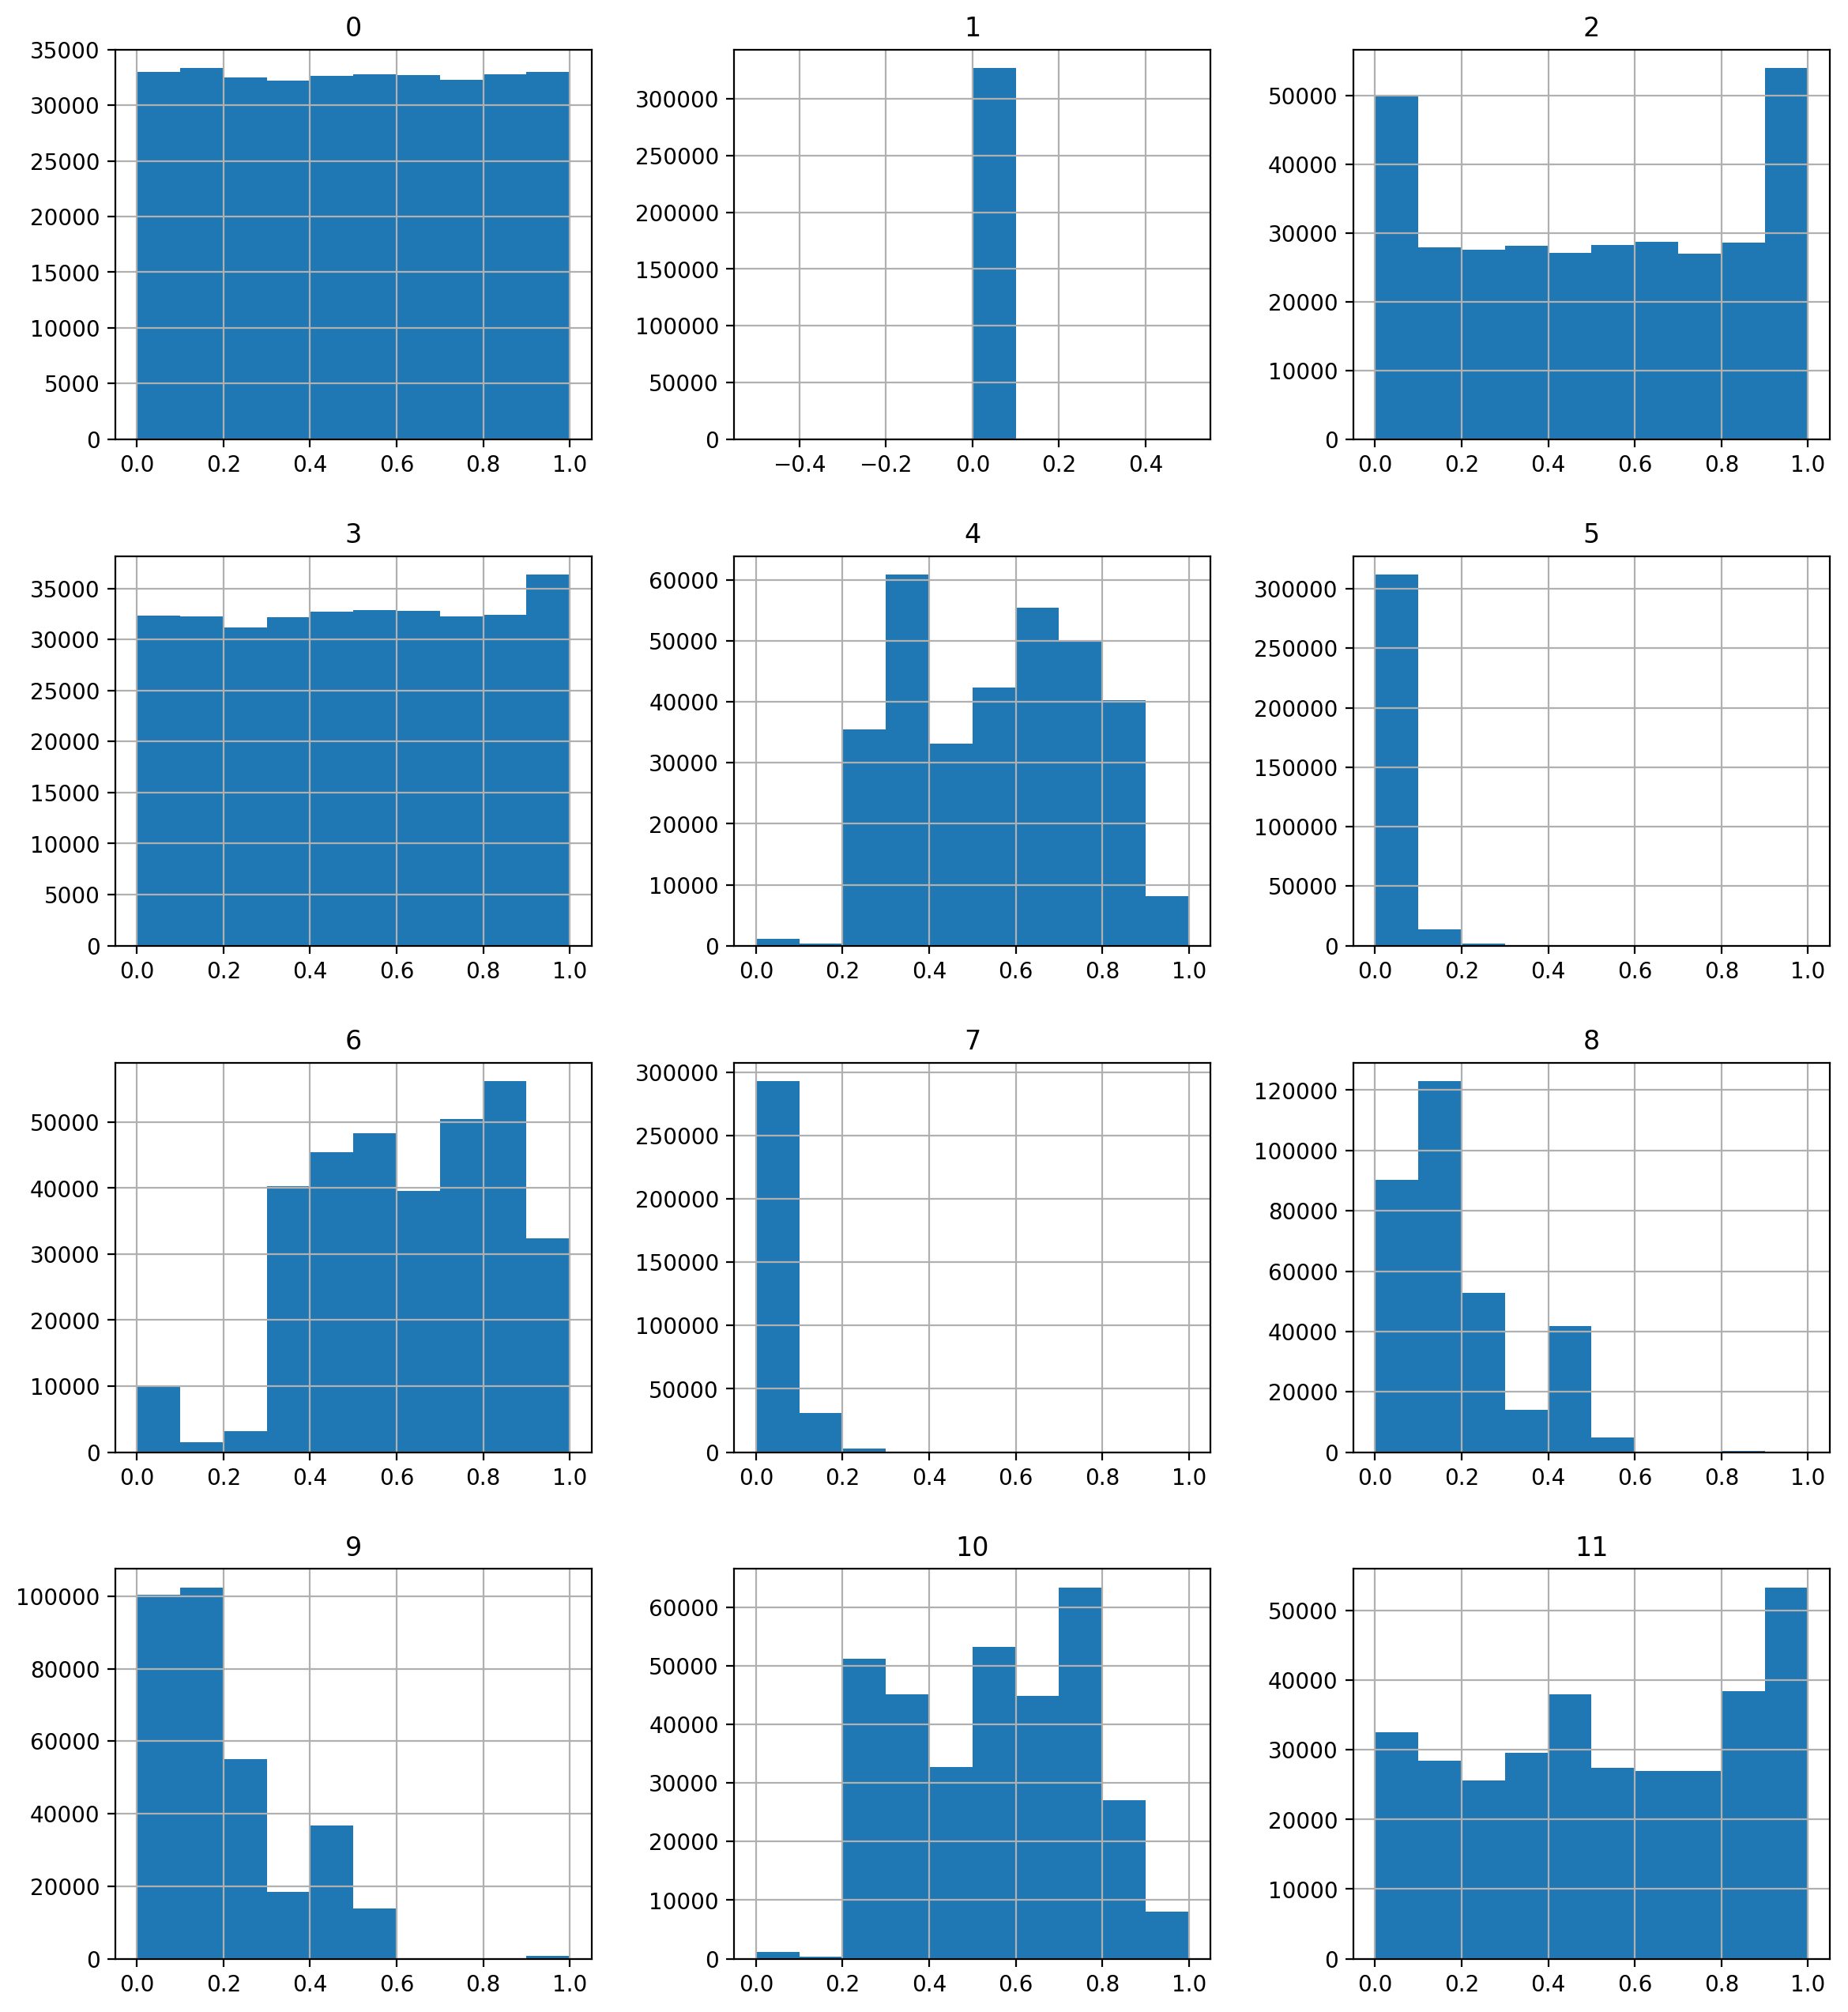

In [86]:
import numpy as np
import matplotlib.pyplot as plt
flights.hist( figsize=(14,16))


In [89]:
flights = flights.apply(np.log)
#flights

c) Handle any nan-values in the dataset, and normalize all relevant variables. Are there any categorical variables? If so, create dummy variables for these.

In [123]:
## This section is to detect 

print("Null values exist in the dataset (true or false) " + str(flights.isnull().any().any()))
print()
print("In what features can we find null values: ")
print(flights.isnull().any())
print()
print("How many?")
print(flights.isnull().sum())


Null values exist in the dataset (true or false) True

In what features can we find null values: 
Unnamed: 0    False
year          False
month         False
day           False
dep_time       True
dep_delay      True
arr_time       True
arr_delay      True
air_time       True
distance      False
hour           True
minute         True
dtype: bool

How many?
Unnamed: 0       0
year             0
month            0
day              0
dep_time      8255
dep_delay     8255
arr_time      8713
arr_delay     9430
air_time      9430
distance         0
hour          8255
minute        8255
dtype: int64


In [156]:
# We have the option to 1. delete entries with Null or to replace them with another value 
#  like the 2. mean, the 3. mode or the 4. median - in this case we have added code for 
#  the first 3 options - but we use option 1 - "dropna"

# Replace: 
#for col in ['dep_time','dep_delay','arr_time','arr_delay','air_time','hour','minute']:
#    flights[col] = flights[col].fillna(flights[col].mode()[0])
#    #flights[col] = flights[col].fillna(flights[col].mean())

# Drop: (It's ~3% of the data, so we have decided to drop it)
flights = flights.dropna()     # Same as: flights.dropna(inplace=True)
    
# We now see that we nolonger have rows with null value in our dataset
print(flights.isnull().sum())

Unnamed: 0    0
year          0
month         0
day           0
dep_time      0
dep_delay     0
arr_time      0
arr_delay     0
air_time      0
distance      0
hour          0
minute        0
dtype: int64


We removed the obvoius categorical fields 'carrier', 'tailnum','flight','origin' and 'dest' - year and month could be candidates since they are not quanties. However, it's not clear that it will improve the model to convert them. 

It could be done using below code:   
`fight_withdummies = pd.get_dummies(flights, prefix='year', columns=['year'])`


d) In the following, we are going to determine which factors cause departure time delays, and try to predict the length of these delays. However, for several departures, a *negative* delay have been reported. How do you interpret a negative delay? Consider if you want to modify the negative delays in some way. 

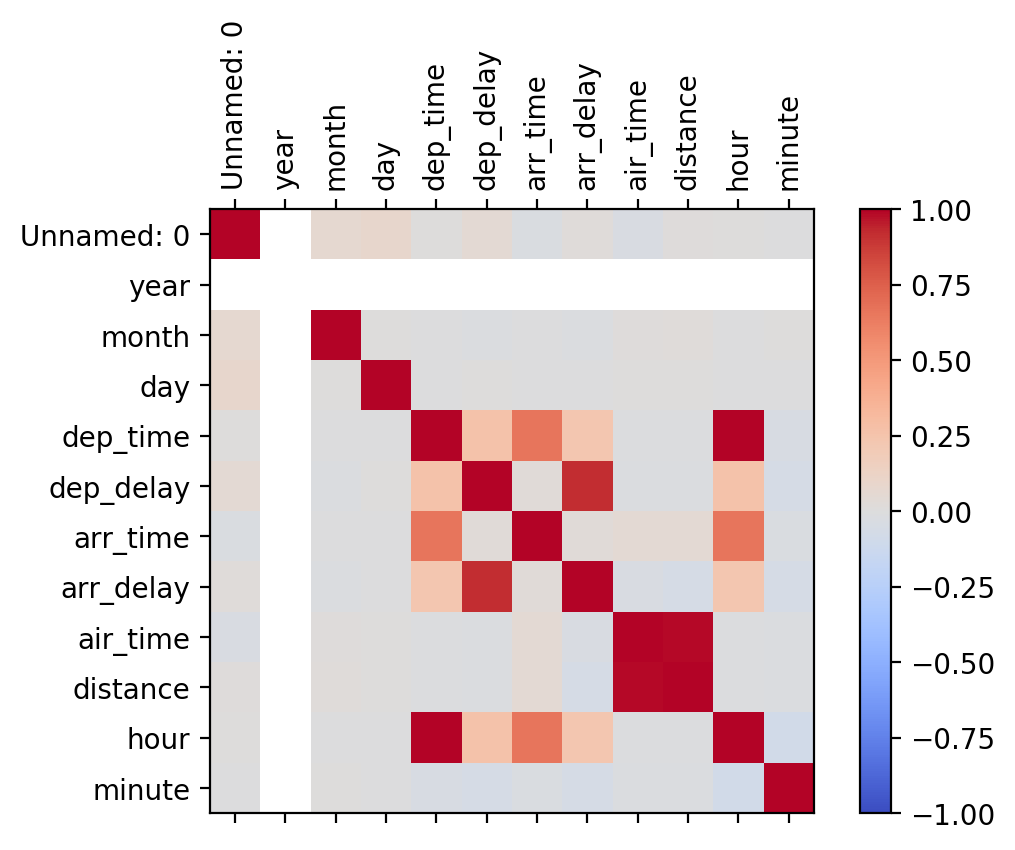

In [63]:
from IPython.core.pylabtools import figsize
import matplotlib
%matplotlib inline

matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.dpi'] = 200

corr = flights.corr()
fig_corr = plt.figure()
ax = fig_corr.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig_corr.colorbar(cax)
ticks = np.arange(0,len(flights.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(flights.columns)
ax.set_yticklabels(flights.columns)
figsize(30, 30)

plt.show()

In [65]:
## Can't iterate the list - so values are compared visually
# Any value in X_test[#] will give "KeyError: #"
print(tree.predict(X_test[:10]))
print(y_test[:10])

[-5.25584112  0.38041164  2.82693741 19.66155364  0.57762836  9.63278127
 26.57894737  0.43663265 30.68353788 10.39750585]
198273    -4.0
269406     0.0
219540    -6.0
120391    31.0
67421     -3.0
84460     -2.0
310508    -8.0
138080    -1.0
227506    -3.0
324460     0.0
Name: dep_delay, dtype: float64


The negative delay is most likely a flight that arrives ahead of schedule. Two approches could be used.   

1. Consider the negative delays along side the delays - because if departures during rain are sometimes delayed and sometimes are ahead of schedule then it's not clear that rain is contributing to the delay. Whereas if you filter out the negatives incorrect patterns might emerge  

2. We could also choose to only look at delays and disregard flights that are ahead, since being ahead of schedule has a very limited positive impact compared to the negative of being delayed

We have chosen option 1

### Regression analysis: Predicting departure time delays

e) Extract the features and the target variable (in this case the departure time delays) from the dataframe. Split the dataset into test and train sets (technically, we ought to have done this before preprocessing. For the sake of simplicity, we do not conform to this best practice in this exercise).

In [125]:
y = flights['dep_delay']

# We drop dep_delay from the dataset since it's now our taget - and we also drop arr_delay since that will not be known 
#  at the time we are trying to prodict departure delay.

# If we leave arr_delay in as a part of the dataset, prediction will be vastly improved - but that would not be 
#  representing a real-life senario

X = flights.drop(columns=['dep_delay','arr_delay'])


In [74]:
#from sklearn import preprocessing

#flight_np = X.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(flight_np)
#X = pd.DataFrame(x_scaled)

In [126]:
# Split data into training and test datq
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

y_train[:5]

177768    30.0
98734     57.0
148619    -7.0
25877     -5.0
58823     -8.0
Name: dep_delay, dtype: float64

f) Train a decision tree regressor for predicting departure time delays (you might want to experiment with a few different values of the hyperparameters to avoid too much overfitting). Plot the tree, and explain how decision trees can be used for regression analyses.

In [127]:
from sklearn.tree import DecisionTreeRegressor

# max_depth=9 is the tipping poing of where we only get an increased accuracy on 
#   the trainingset (overfitting) by increasing the value. If we lower the value we get a lower
#   score on the test set (underfitting)
tree = DecisionTreeRegressor(max_depth=9)
tree.fit(X_train, y_train)

print("Accuracy on training data: {}".format(tree.score(X_train, y_train)))
print("Accuracy on testing data: {}".format(tree.score(X_test, y_test)))

# Coff. of explained variance r^2

Accuracy on training data: 0.3081874578190936
Accuracy on testing data: 0.2700089392361128


In [112]:
print(tree.predict(X_test[:10]))
print(y_test[:10])



[-1.62456340e-04  1.07827789e+01  3.41269841e+00  7.55875753e+00
  8.62039660e+00  7.55875753e+00  4.88069853e+01  2.87691284e+00
  9.61665021e-01  3.36934791e+01]
208471   -1.0
171573    0.0
97110    -1.0
168318   -3.0
51080    -2.0
184279   -3.0
214615    0.0
70801    -5.0
302210   -6.0
252219   -1.0
Name: dep_delay, dtype: float64


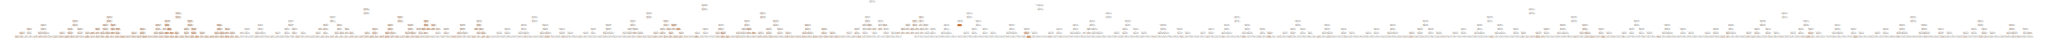

In [16]:
from sklearn.tree import export_graphviz
import graphviz as graphviz
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = export_graphviz(tree, out_file=None,filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

g) Do a regression analysis as the one above, but using a random forest instead of a single decision tree. Use a grid-search to determine a good set of hyperparameters. When you have found the best model, score your model on the test set. Comment on the result. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# max_depth=9 - since it seemed to produce good results in the prev. example
# max_features=5 - we want to find feature_importances_ so we reduce to a limited subset of our features

RandForReg = RandomForestRegressor(max_depth=9, random_state=0, n_estimators=60, max_features=5)
RandForReg.fit(X_train, y_train)

#RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
#           max_features='auto', max_leaf_nodes=None,
#           min_impurity_decrease=0.0, min_impurity_split=None,
#           min_samples_leaf=1, min_samples_split=2,
#           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
#           oob_score=False, random_state=0, verbose=0, warm_start=False)
print(RandForReg.score(X_test, y_test))
# Acc: ~0.29, random forest is doing only slightly better (~0.03) than the standard DecisionTreeRegressor






In [ ]:
print(RandForReg.feature_importances_)

n_features = X_train.columns
plt.barh(range(len(n_features)), RandForReg.feature_importances_, align='center')
plt.yticks(np.arange(n_features), n_features)
plt.xlabel("Feature importance")
plt.ylabel("Feature")

In [ ]:
X_train.columns


h) Plot the feature importances determined by the tree. Which feature is the most important? Do you have any idea as to why? Remove any features which cannot be used to predict departure time delays in any meaningful way, and redo the analysis. Comment on your results.

### Regression analysis: Predicting arrival time delays

In the last part of the exercise, we are going to try to predict arrival time delays as a function of departure time delays - it might be of interest to know how large a delay one should expect after the plane has departed from the airport. 

i) Train a decision tree or random forest regressor and an OLS (Ordinary least squares) to the dataset, and see how well arrival time delay. can be predicted based on departure time delay. 

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split

flights = pd.read_csv('flights.csv')

# Set all null values to the mode - except in the target 'arr_delay'
# for col in ['dep_time','dep_delay','arr_time','air_time','hour','minute']:
#     flights[col] = flights[col].fillna(flights[col].mode()[0])    

# Only the target column now contains Null - drop all rows that don't have a valid target    
flights = flights.dropna()

# The training target y is now "arr_delay" 
y = flights['arr_delay']

# We drop the taget "arr_delay" from the dataset and "air_time" since that is not known at the 
#  time we try to make the prediction
flights = flights.drop(columns=['arr_delay','air_time', 'tailnum','flight', 'Unnamed: 0', 'year']) 

#flights = flights.drop(columns=['carrier','origin','dest']) 

# We make dummy colums for the category features and drop the original column afterwards
for col in ['carrier','origin','dest']:
    flights = pd.get_dummies(flights, prefix=col, columns=[col])

X_train, X_test, y_train, y_test = train_test_split(flights.values, y.values)



In [66]:
from sklearn.ensemble import RandomForestRegressor
RandForReg = RandomForestRegressor(max_depth=9, random_state=0, n_estimators=60)
RandForReg.fit(X_train, y_train)
print("RandomForestRegressor train: " + RandForReg.score(X_train, y_train))
print("RandomForestRegressor test: " + RandForReg.score(X_test, y_test))
# Include 'carrier','origin','dest'

# Drop: 'carrier','origin','dest'
# 0.853698180441777
# 0.8470817082666438


0.8546555601363309
0.8436125215146496


In [67]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
print("DecisionTreeRegressor train: " + tree.score(X_train, y_train))
print("DecisionTreeRegressor test: " + tree.score(X_test, y_test))


TypeError: can only concatenate str (not "numpy.float64") to str

In [61]:
for x, y in zip(X_test[1:10], y_test[1:10]):
    prediction = RandForReg.predict([x])[0]
    actual = y
    print("X = {}".format(prediction))
    print("y = {}".format(actual))
    print("Deviation: {}\n".format(abs(round((prediction - actual), 2))))

X = -0.9407139661525236
y = -7.0
Deviation: 6.06

X = 5.321943645493249
y = -3.0
Deviation: 8.32

X = 0.8429978352009999
y = -8.0
Deviation: 8.84

X = 4.549096140341808
y = 14.0
Deviation: 9.45

X = 0.028118794356953785
y = -17.0
Deviation: 17.03

X = 6.026737787874298
y = 128.0
Deviation: 121.97

X = 0.40425659313636947
y = -11.0
Deviation: 11.4

X = 0.8061853493484777
y = 9.0
Deviation: 8.19

X = -0.7408735033784521
y = 3.0
Deviation: 3.74



In [153]:
from sklearn.linear_model import LinearRegression
#Linear regression (aka ordinary least squares) Page 47 in introduction to Machine Learning with Python

LinReg = LinearRegression()
LinReg.fit(X_train,y_train)

print("Accuracy on training Linear Regressor = {}".format(LinReg.score(X_train, y_train)))
print("Accuracy on testing Linear Regressor = {}\n".format(LinReg.score(X_test, y_test)))


# If we have dep_delay in the dataset arr_delay is quite straight-forward to predict
# Accuracy on training Linear Regressor = 0.8433256008634671
# Accuracy on testing Linear Regressor = 0.8440976661549846


Accuracy on training Linear Regressor = 0.8433256008634671
Accuracy on testing Linear Regressor = 0.8440976661549846



j) Plot the arrival time delays as a function of the departure time delay, and show the predictions from each of the two regressors.

Text(0, 0.5, 'arr')

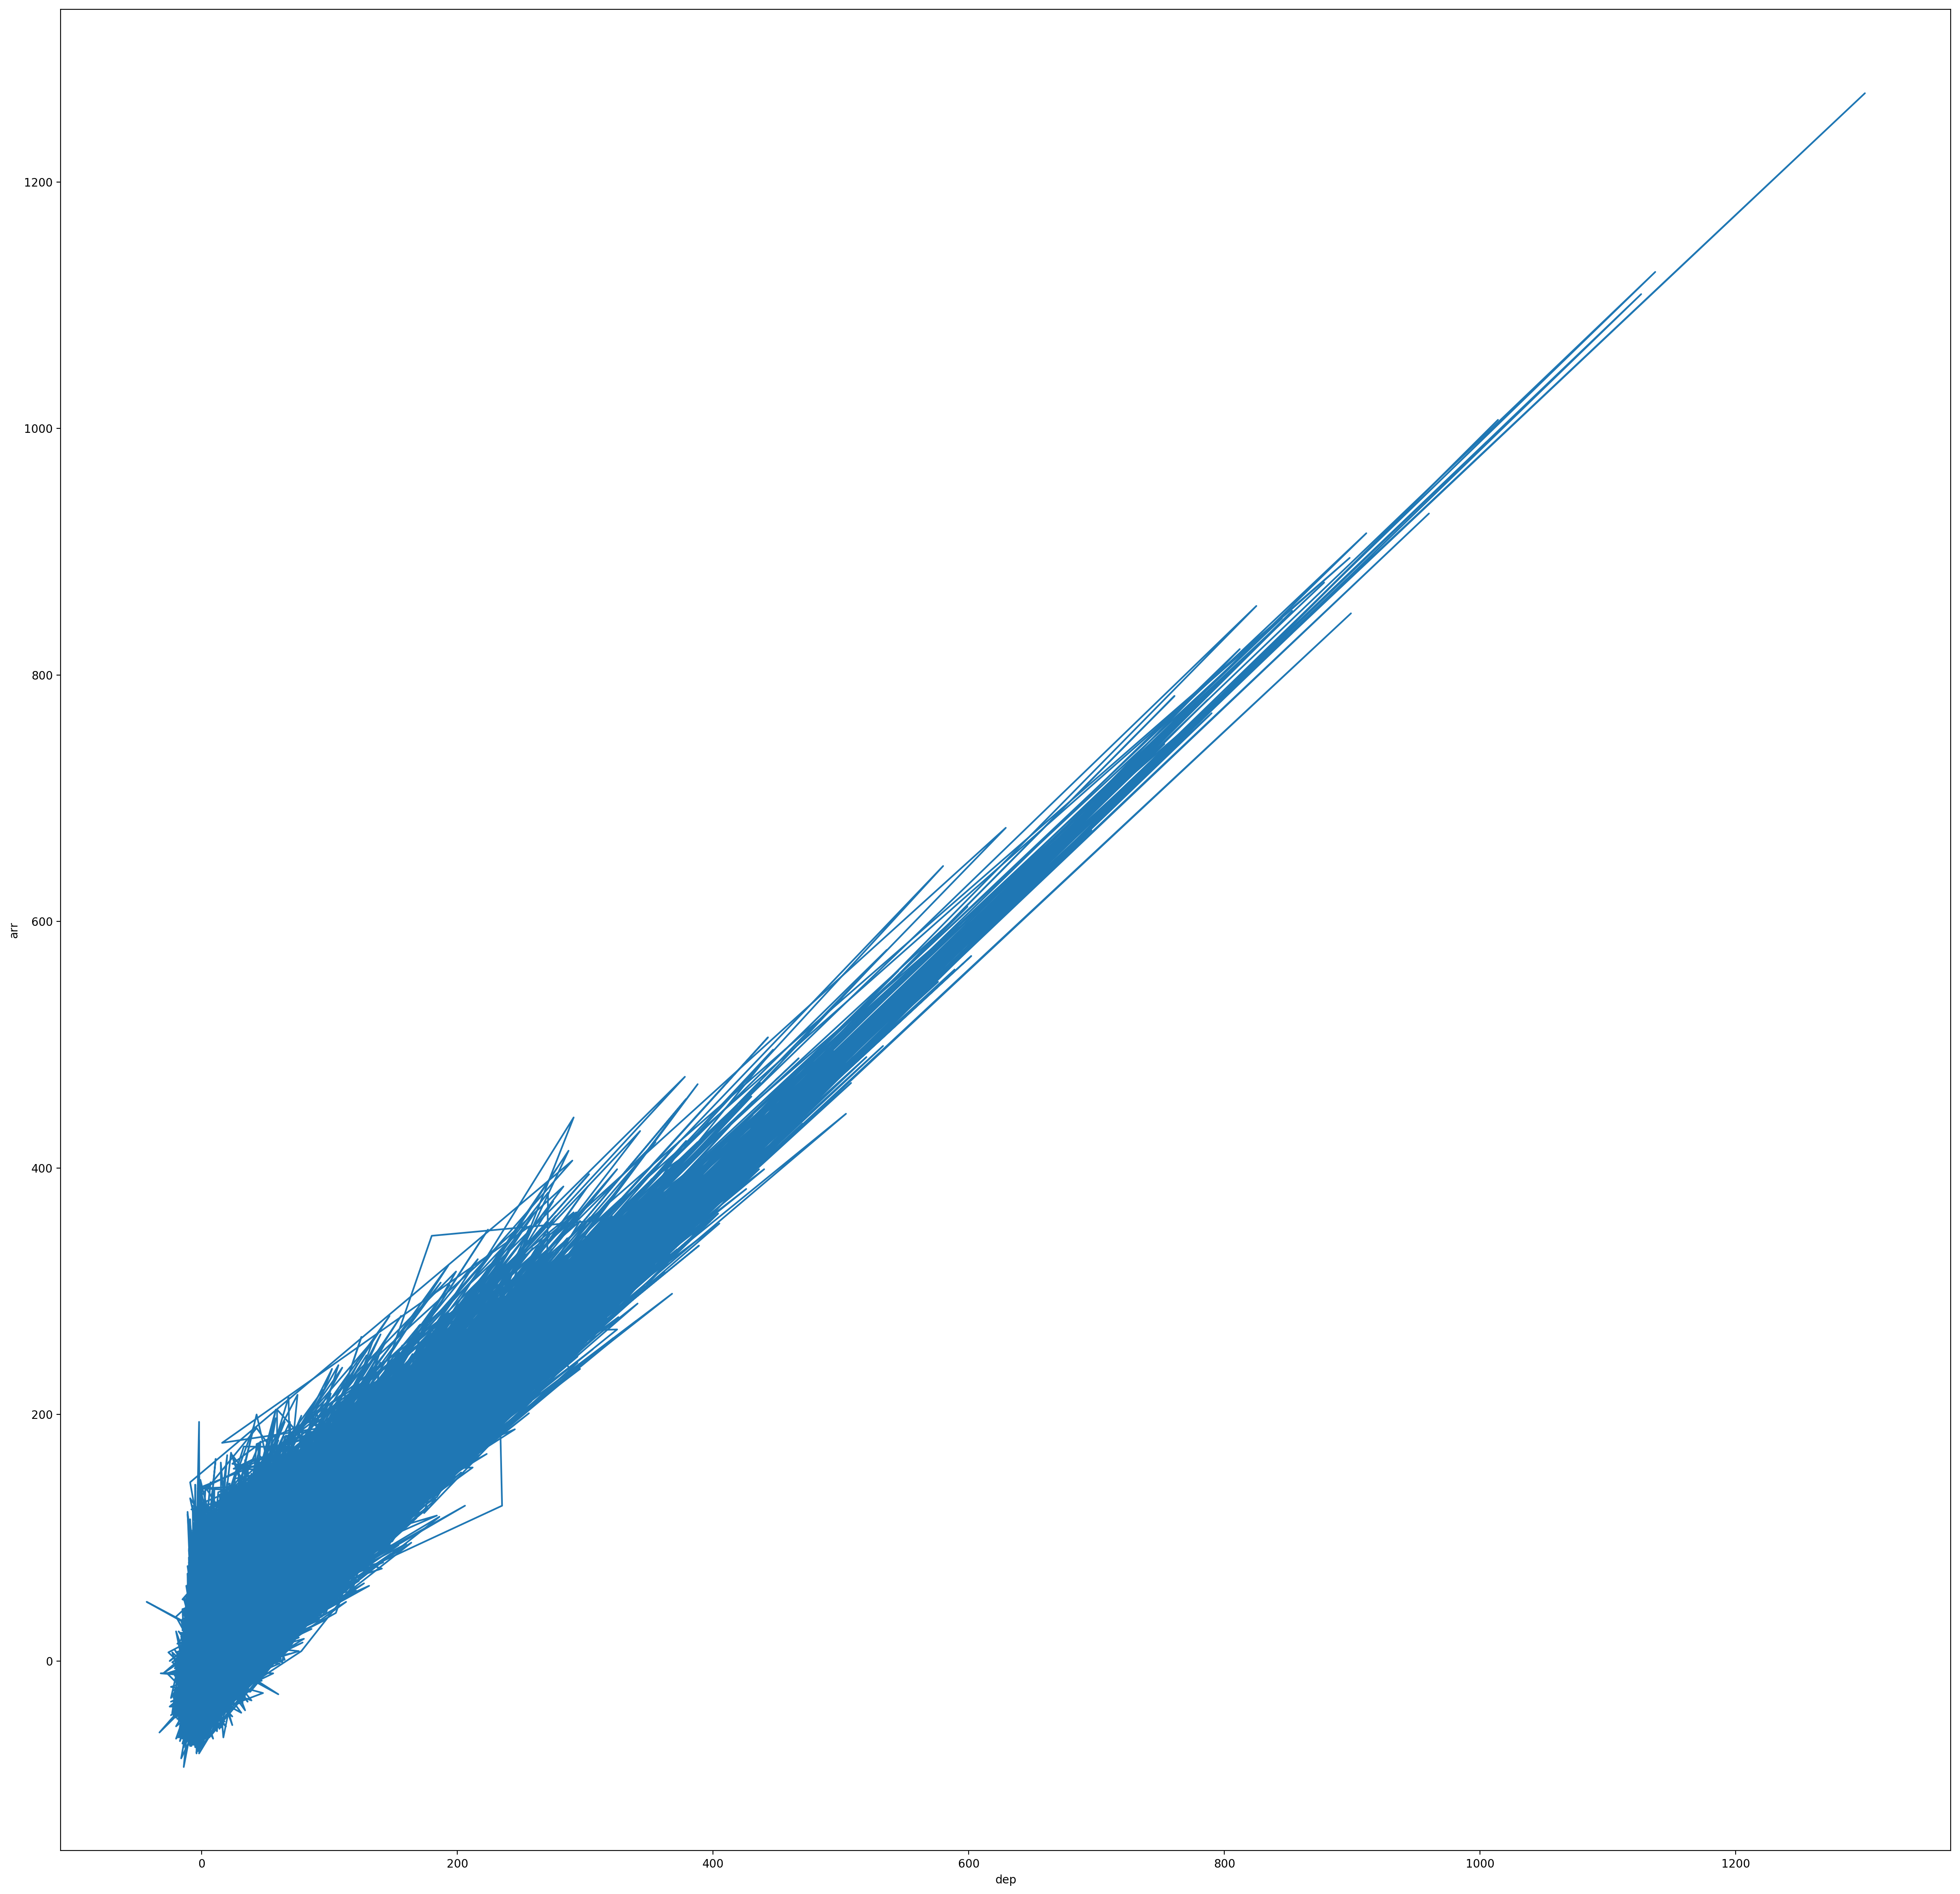

In [174]:
# Here we plot the data directly, to validate that our function looks correct
matplotlib.rcParams['agg.path.chunksize'] = 10000
plt.plot(flights['dep_delay'], flights['arr_delay'])
plt.xlabel("dep")
plt.ylabel("arr")


In [175]:
LinReg = LinearRegression()
LinReg.fit(flights['dep_delay'].values.reshape(-1, 1),flights['arr_delay'])
print(LinReg.coef_)
print(LinReg.intercept_)

[1.01909292]
-5.899493477084271


Text(0, 0.5, 'dep')

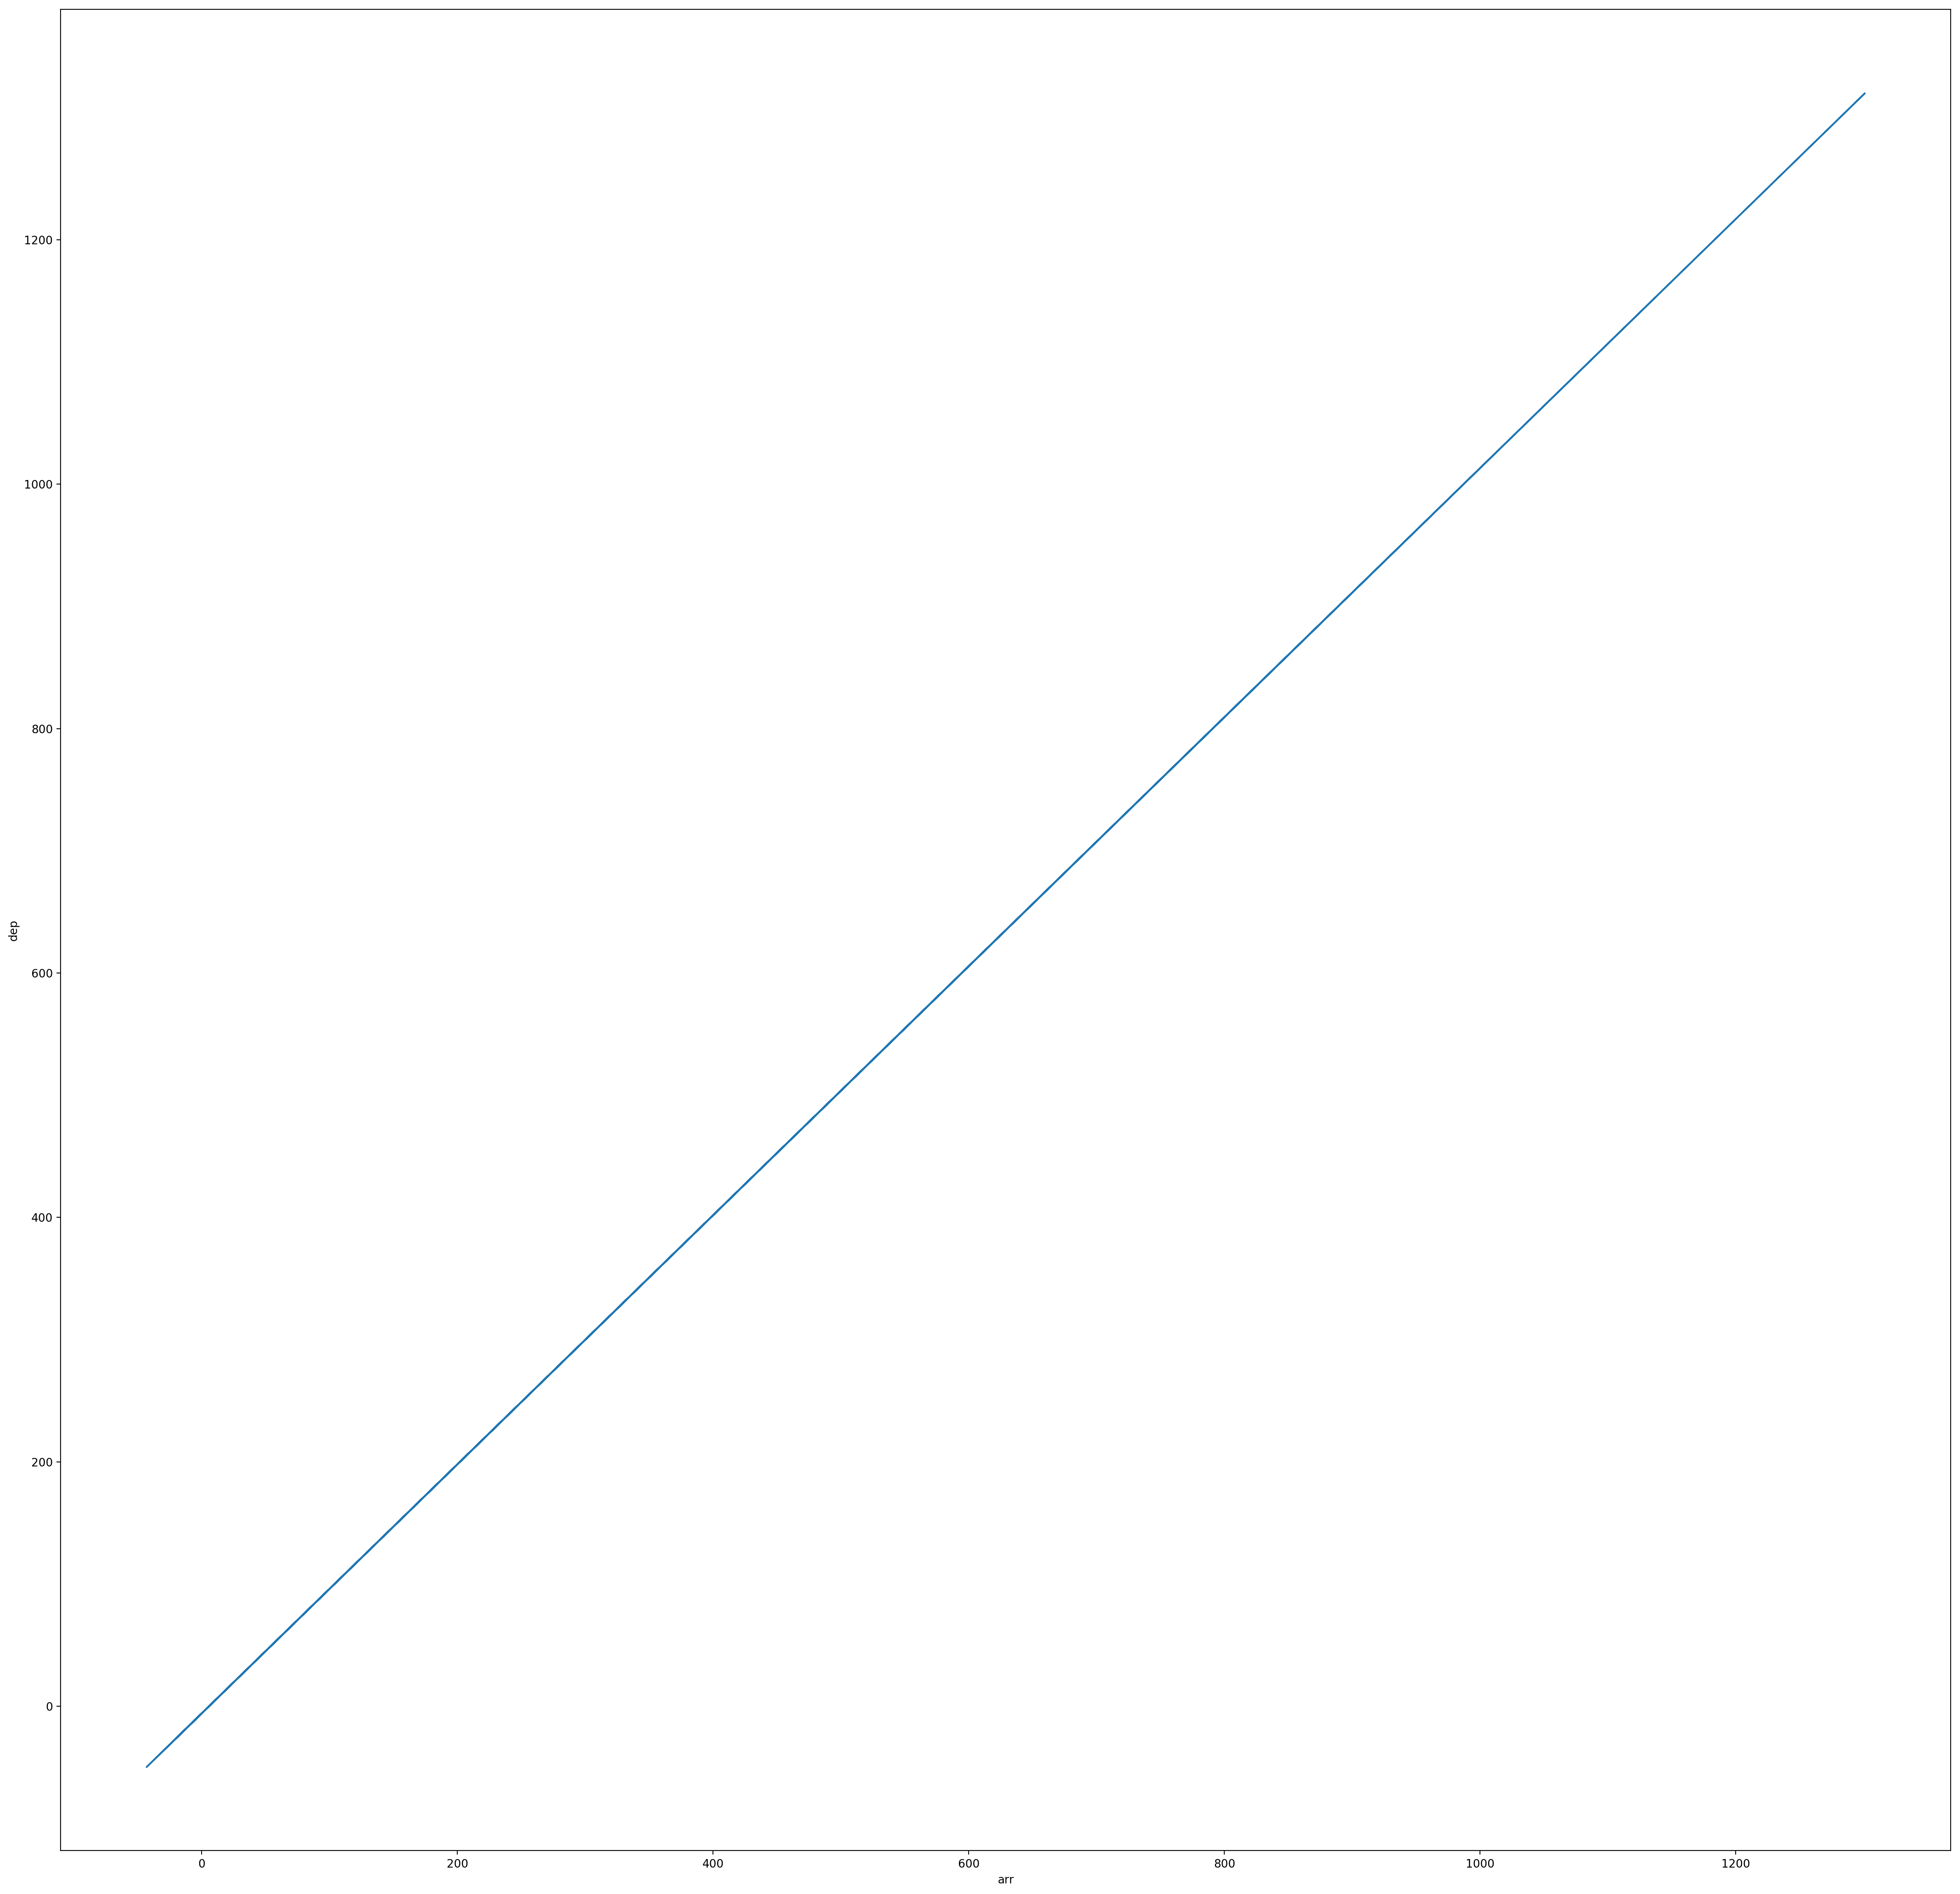

In [176]:
# We plot the linear function as a function of arr_delay - and it matches quite well with the dataplot from above
plt.plot(flights['dep_delay'], flights['dep_delay'] * LinReg.coef_+ LinReg.intercept_ )
plt.xlabel("arr")
plt.ylabel("dep")

In [208]:
RandForReg = RandomForestRegressor(max_depth=9, random_state=0, n_estimators=60)
RandForReg.fit(flights['dep_delay'].values.reshape(-1, 1),flights['arr_delay'])
RandForReg.predict(flights['dep_delay'].values.reshape(-1, 1))

array([ -3.82354571,  -2.20991247,  -3.82354571, ..., -11.73865033,
         6.27517093, -15.45430103])

k) Based on the results obtained above, make a plot that extrapolates a little bit in order to predict delays slightly larger than the largest delay found in the dataset. Which model do you think gives the most trustworthy extrapolation? 

In [185]:
longestArrDelay = max(flights['arr_delay'])
# Largest delay: 1272 (21 h)

# Try to predict based on larger (than max) delay: 1300 - result: 1318
LinReg.predict([[1300]])


array([1318.92129673])

In [191]:
from sklearn.tree import DecisionTreeRegressor

DecReg = DecisionTreeRegressor(max_depth=9)
DecReg.fit(flights['dep_delay'].values.reshape(-1, 1), flights['arr_delay'])

# Try to predict based on larger (than max) delay: 1300 - result: 1272 - matches the max value 
#  - so no extrapolation takes place  
DecReg.predict([[1300]])


array([1272.])

l) Hopefully you found that it is possible to predict arrival time delays quite confidently from departure time delays. See if you can improve these predictions by including some (or all) of the other features. You are encouraged to try out several different machine learning algorithms.